In [36]:
import tensorflow as tf
import os


In [37]:
# Avoid OOM(Out of memory) errors by setting GPU Memory Consumption Growth limiting GPU usage 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


In [38]:
tf.config.list_physical_devices('GPU')


[]

In [39]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [40]:
data_dir = r"C:\Users\Soham\OneDrive\Desktop\Hackathons\TSEC_hack\test" 

In [41]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [42]:
#looping to every folder to remove all the unnecessary images

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image) #looping through every single image
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [43]:
import numpy as np
from matplotlib import pyplot as plt


In [44]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 233 files belonging to 2 classes.


In [45]:
data_iterator = data.as_numpy_iterator() #iterate through data


In [46]:
#class 1  = Unripe #class2 is ripe
batch = data_iterator.next()

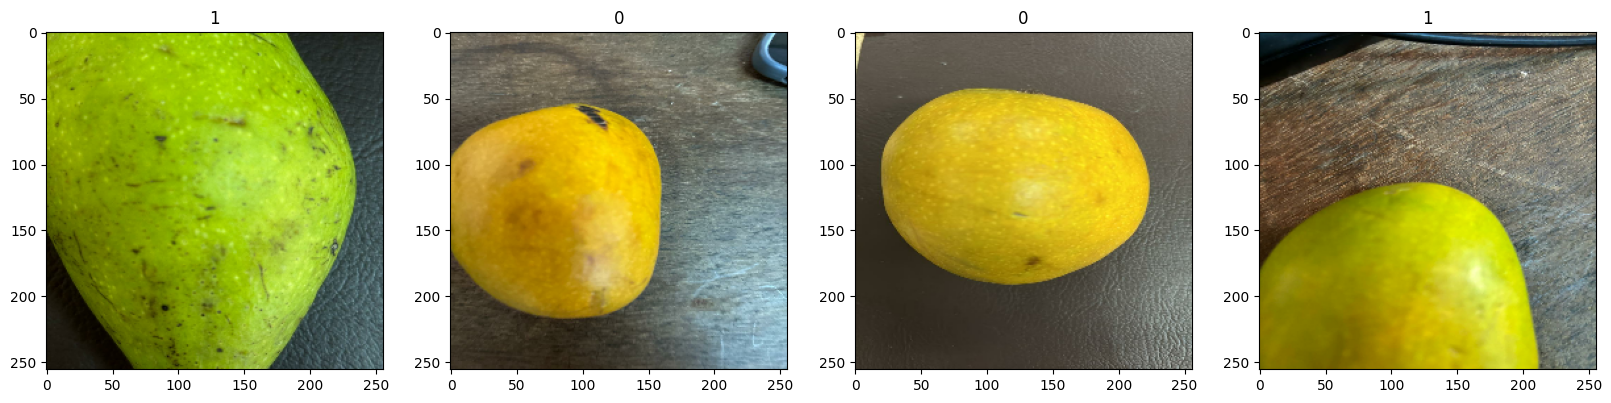

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [48]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

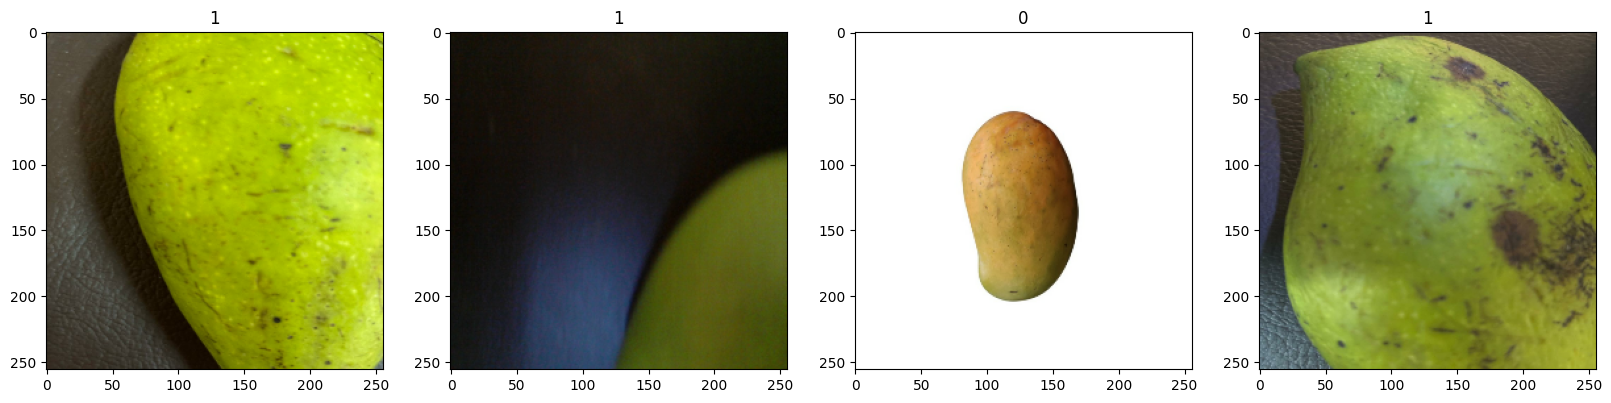

In [49]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [50]:
len(data)

8

In [51]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [52]:
test_size + val_size + train_size

6

In [53]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [54]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [56]:
model = Sequential()

In [57]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [58]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [59]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [60]:
logdir = r"C:\Users\Soham\OneDrive\Desktop\Hackathons\TSEC_hack\log"

In [61]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [62]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 8s 1s/step - loss: 1.3321 - accuracy: 0.5250 - val_loss: 0.6831 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 6s 1s/step - loss: 0.6719 - accuracy: 0.5500 - val_loss: 0.6437 - val_accuracy: 0.6875
Epoch 3/20
5/5 [==============================] - 7s 1s/step - loss: 0.6436 - accuracy: 0.6000 - val_loss: 0.5991 - val_accuracy: 0.6250
Epoch 4/20
5/5 [==============================] - 7s 1s/step - loss: 0.5437 - accuracy: 0.6938 - val_loss: 0.5320 - val_accuracy: 0.6562
Epoch 5/20
5/5 [==============================] - 6s 1s/step - loss: 0.4725 - accuracy: 0.7188 - val_loss: 0.3469 - val_accuracy: 0.8438
Epoch 6/20
5/5 [==============================] - 6s 1s/step - loss: 0.3824 - accuracy: 0.8750 - val_loss: 0.4541 - val_accuracy: 0.7500
Epoch 7/20
5/5 [==============================] - 7s 1s/step - loss: 0.2996 - accuracy: 0.8875 - val_loss: 0.1519 - val_accuracy: 0.9062
Epoch 8/20
5/5 [=========================

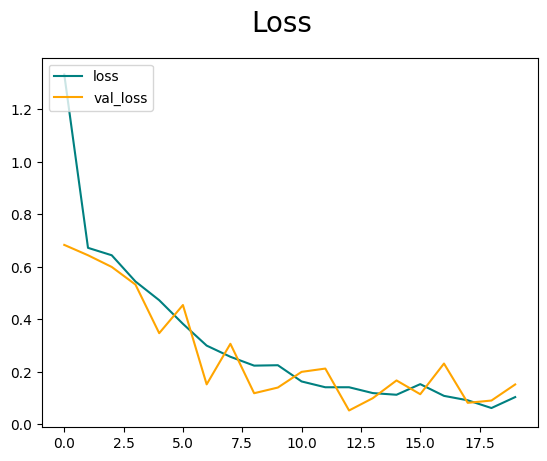

In [63]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

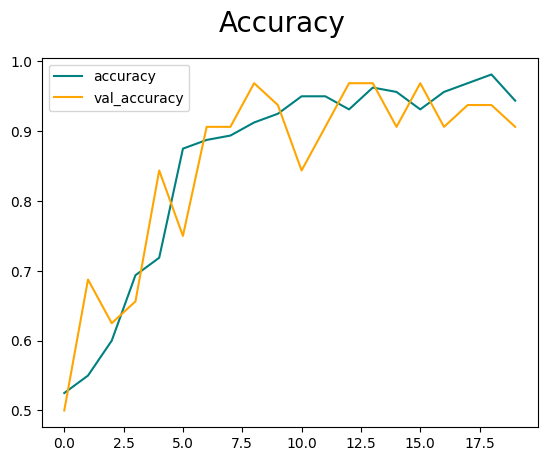

In [64]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [65]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [66]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [67]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [68]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.0, Recall:0.0, Accuracy:0.0


In [69]:
save_model_loc = r"C:\Users\Soham\OneDrive\Desktop\Hackathons\TSEC_hack"
model.save(os.path.join(save_model_loc,'mango_classifier_3.h5'))
